In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

path = '/Users/dangloan/Documents/learning_analytics/project/'

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

In [4]:
df = pd.read_csv(path + '3_data/clothing_review/Womens Clothing E-Commerce Reviews.csv')

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.columns =['Clothing_ID','Age','Title','Review_Text',
             'Rating','Recommended_IND','Positive_Feedback_Count',
             'Division_Name','Department_Name','Class_Name']

In [7]:
df.head(2)

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses


##### A product (Clothing_ID) can receive more than one review. So, analysis per product can be an idea.

In [ ]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)

In [ ]:
profile

In [8]:
# Remove duplicates
df[df.duplicated(keep=False)].sort_values(by='Clothing_ID')
df.drop_duplicates(keep='first',inplace=True)

In [67]:
a = df.groupby('Class_Name').agg({'Rating': ['mean','std','count'],
                                 'Recommended_IND':['mean']}).reset_index()
a.columns = ['Class_Name','Rating_mean','Rating_std','Rating_count','Rec']
a = a[~a['Class_Name'].isin(['Chemises','Casual bottoms','Trend'])]


dept_map = df[['Class_Name','Department_Name']]
dept_map.drop_duplicates(keep='first', inplace=True)
dept_map.dropna(inplace=True)

a = pd.merge(a, dept_map, how='left', on='Class_Name')
a=a.sort_values('Rating_mean',ascending=False)

In [68]:
import plotly.express as px
# df = px.data.gapminder()

fig = px.scatter(a, x="Rating_std", y="Rating_mean",
                 size="Rating_count", color="Department_Name",
                 hover_name="Class_Name",
#                  log_x=True,
#                  log_y= True,
                 size_max=80)

fig.update_layout(
    title='Rating Statistics by Class and Department',
    xaxis=dict(
        title='Rating Std',
        gridcolor='white',
#         type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Rating Mean',
        gridcolor='white',
#         type='log',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

import plotly as py
py.offline.init_notebook_mode(connected=True)
py.offline.plot(fig, filename='rating_stats_by_class_dept.html')

'rating_stats_by_class_dept.html'

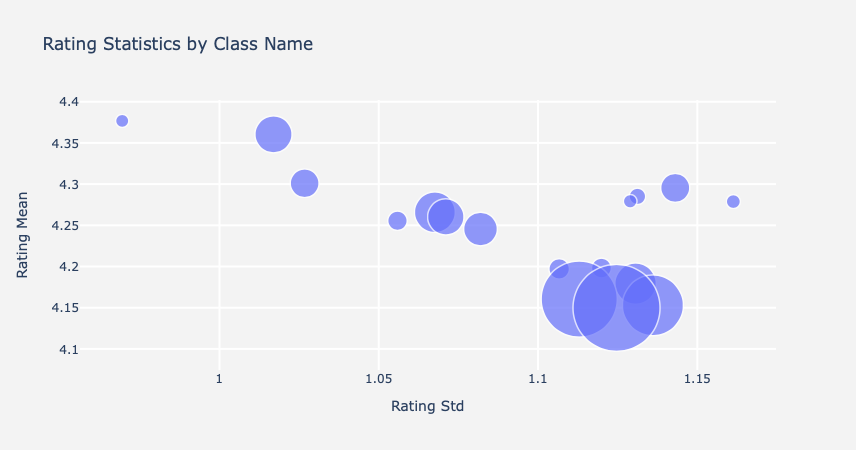

In [75]:
import plotly.graph_objects as go
fig = go.Figure()
size = [20, 40, 60, 80, 100, 80, 60, 40, 20, 40]
fig = go.Figure(data=[go.Scatter(
    x=a['Rating_std'],
    y=a['Rating_mean'],
    text=a['Class_Name'],
    mode='markers',
    marker=dict(
        size=a['Rating_count'],
        sizemode='area',
        sizeref=2.*max(size)/(60.*2),
        sizemin=4,
        line_width=1.5
    )
)])

fig.update_layout(
    title='Rating Statistics by Class Name',
    xaxis=dict(
        title='Rating Std',
        gridcolor='white',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Rating Mean',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()

There are interesting differences in rating statistics between different clothing classes. There are interesting differences in rating statistics between different clothing classes. 

Group 1: Classes in **Dresses** and **Tops** are the most frequently bought and also received a large number of bad reviews. That was why rating average of these classes/departments are lower than overall rating average (lower than 4.19, except *Fine Gauge*). They are big bubbles on the lower right corner of the above graph.

Group 2: **Bottoms** products including *Jeans, Pants, Shorts, Skirts*, and **Intimate** products including *Layering and Lounge* have higher average rating, and lower rating standard deviation. This is understandable because they have smaller customer base, thus, smaller range of opinions than the first group.
Group 3: The third group are small classes that have high rating average and high rating standard deviation. They are **Jackets** and **Intimates, Sleep, Legwear**. As they have very small number of reviews, rating values can be influenced by some extreme opinions and vary more than other classes.

In [ ]:
import matplotlib.gridspec as gridspec

x=df.Class_Name.value_counts(normalize = True).reset_index().sort_values(by = 'index')
x.columns=['Class_Name','count']
freq=x.sort_values(by='Class_Name')['count'].tolist()
features =x.sort_values(by='Class_Name')['Class_Name'].tolist()



number_gp = 17
# freq = the percentage for each age group, and there’re 7 age groups.


def ax_settings(ax, var_name, x_min, x_max):
    ax.set_xlim(x_min,x_max)
    ax.set_yticks([])
    
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.spines['bottom'].set_edgecolor('#444444')
    ax.spines['bottom'].set_linewidth(2)
    
    ax.text(0.02, 0.05, var_name, fontsize=10, fontweight="bold", transform = ax.transAxes) 
    return None
# Manipulate each axes object in the left. Try to tune some parameters and you'll know how each command works.


fig = plt.figure(figsize=(12,7))
gs = gridspec.GridSpec(nrows=number_gp, 
                       ncols=2, 
                       figure=fig, 
                       width_ratios= [3, 1],
                       height_ratios= [1]*number_gp,
                       wspace=0.2, hspace=0.5
                      )
ax = [None]*(number_gp + 1)

# Create a figure, partition the figure into 7*2 boxes, set up an ax array to store axes objects, and create a list of age group names.  


for i in range(number_gp):
    ax[i] = fig.add_subplot(gs[i, 0])
    
    ax_settings(ax[i], 'Class: ' + str(features[i]), 0, 6)    
    
    sns.kdeplot(data=df[(df.Class_Name == features[i])].Rating, 
            ax=ax[i], shade=True, color="blue", bw=0.1, legend=False)
    
    if i < (number_gp - 1): 
        ax[i].set_xticks([])
# this 'for loop' is to create a bunch of axes objects, and link them to GridSpec boxes. Then, we manipulate them with sns.kdeplot() and ax_settings() we just defined.


  

ax[number_gp] = fig.add_subplot(gs[:, 1])
ax[number_gp].spines['right'].set_visible(False)
ax[number_gp].spines['top'].set_visible(False)
ax[number_gp].barh(features, freq, color='#004c99')
ax[number_gp].set_xlim(0,100)
ax[number_gp].invert_yaxis()
ax[number_gp].text(1.09, -0.04, '(%)', fontsize=10, transform = ax[number_gp].transAxes)   
ax[number_gp].tick_params(axis='y', labelsize = 14)
# manipulate the bar plot on the right. Try to comment out some of the commands to see what they actually do to the bar plot.

plt.show()

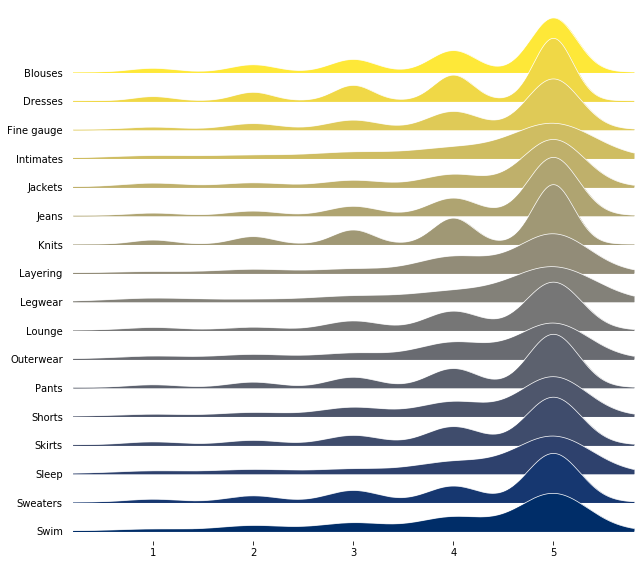

In [78]:
#Creating 1 row and 2 columns grid
import joypy
x = df[~df['Class_Name'].isin(['Chemises','Casual bottoms','Trend'])]
fig, ax1 = plt.subplots(figsize=(9,8))

joypy.joyplot(x, by='Class_Name', column='Rating',ax=ax1,
              linewidth=0.7,linecolor='white',
             colormap=cm.cividis_r)
plt.show()

Rating pattern in differs between different classes. This pattern confirms the differences in rating statistics (MEAN of rating, STANDARD DEVIATION of rating) between classes in the bubble chart.

Knowing which classes perform worse and which are better is only one part of the journey. Noting this diffent, it is worth to look at customer insights into each classes of clothing. Customer insights derived from review texts (especially in negative reviews).

The goal is to address what make the difference, i.e. where the issues are. Which products within lesser performers contribute the most the overall statistics, and what are wrong with those products. Again, the topic modeling applied to each review item can help answer the questions.

### Data Preprocessing

Now, I'm going to clean the Review_Text field in order to extract insights from this data.

In [17]:
df['Review_Text'] = df['Review_Text'].astype(str)

In [18]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dangloan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dangloan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
## Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

In [20]:
# Clean Review_Text

def clean(text):
    #Remove punctuations
    t = re.sub('[^a-zA-Z]',' ',text)
    #Convert to lowercase
    t = t.lower()
    #Remove tags
    t=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",t)
    #Remove special characters and digits
    t=re.sub("(\\d|\\W)+"," ",t)
    #Convert to list from string
    t = t.split()
    #Remove stopwords
    t = [word for word in t if not word in stop_words]
    t = " ".join(t)
    return t

df['Review_Text_cleaned'] = df['Review_Text'].apply(lambda x: clean(x))
df['Review_Text_cleaned'].dropna(inplace=True)

In [21]:
#Tokenize
from nltk.tokenize import sent_tokenize
df['Review_Text_sentences'] = df['Review_Text_cleaned'].apply(sent_tokenize)

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def token_text(text):
    return [w_tokenizer.tokenize(w) for w in text]
df['Review_Text_tokenized'] = df['Review_Text_sentences'].apply(token_text)

[nltk_data] Downloading package punkt to /Users/dangloan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
#POS tagging
from nltk import pos_tag

# def pos_tag(text):
#     return [pos_tag(w) for w in text]
# df2['Review_Text_postag'] = df2['Review_Text_sentences'].apply(pos_tag) ## This function results in an 
#                                                                            ## error "Maximum recursion"

df['Review_Text_postag'] = df['Review_Text_tokenized'].apply(lambda sentence:
                        [pos_tag(token) for token in sentence])

In [23]:
# Convert Penn treebank tag to wordnet tag
from nltk.corpus import wordnet
def penn_to_wn_tags(pos_tag):
    if pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('J'):
        return wordnet.ADJ
#     elif pos_tag.startswith('R'):
#         return wordnet.ADV
    else:
        return None

# lemmatize text based on POS tags
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemmatize_text(text):
#     pos_tagged_text = pos_tag_text(text)
    lemmatized_tokens = [[wnl.lemmatize(el[0], penn_to_wn_tags(el[1]))
                         if penn_to_wn_tags(el[1]) else el[1]
                         for el in pos_tagged_text]
                         for pos_tagged_text in text]
    
    return lemmatized_tokens

In [24]:
df['Review_Text_lemmatized'] = df['Review_Text_postag'].apply(lemmatize_text)

In [25]:
from itertools import chain 
df['tokens'] = df['Review_Text_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
df['tokens'] = df['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in stop_words and len(token)>2])

In [ ]:
# processed_data=df['tokens'].values.tolist()
# flat_data = [item for sublist in processed_data for item in sublist]

### Visualize data with wordcloud

After cleaning the text, it's time to explore the data. I would be curious to see what customers like in positive reviews and don't like in negative reviews. I'm also interested in what customers mention in high rating classes (Layering, Jeans, etc.) and lower-than-average rating classes (Sweaters, Knits, Dressees, Blouses).

In [38]:
# Explore review review title with wordcloud
# Start with loading all necessary libraries
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
# %% [code]
neg_rating = df[(df['Rating'] <= 3)]
pos_rating = df[(df['Rating'] == 5)]

In [53]:
stop_words = set(stopwords.words("english"))
my_words = ['nan','way','back','x','bit','JJS','DT','CD','VBZ','MD', 'RB','rp','wrb','wdt',
            'disappointed','usually','still','bottom','however','item',
            'reason','much','great','definitely','lb','DT','work',
            'x','feel','pair','super','fall','piece','cd',
            'seem','md','coat','beautiful','thought','felt',
            'sad','ordered','someone','perfect',
            'make','wear','love','get','go','order','try','want',
            'run','think','see','review','buy','good',
            'take','come','give','keep','put','need','say','online',
            'bad','nice','cool','dt','rbr','person','purchase',
            'jacket','pants','pant','shirt','dress','sweater','top','skirt','jean','blouse','denim',
           'look','like','really','would','find',
           'cute','flatter','unflattering']
stop_words = stop_words.union(my_words)

There are 288666 words in the combination of selected review.


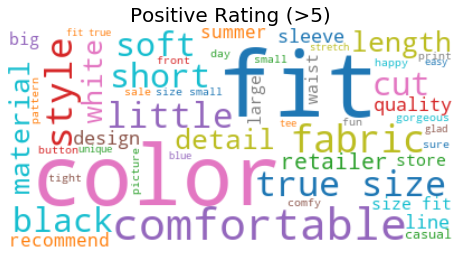

                                                  
There are 121987 words in the combination of selected review.


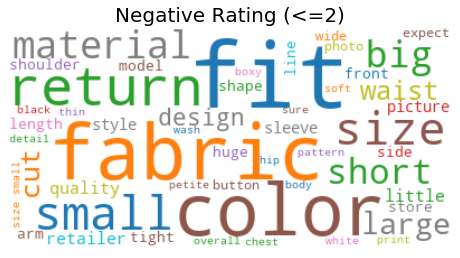

In [54]:
# %% [code]
#Creating a list of custom stopwords

def wordcloud(data,title,color):
#     processed_data=data['tokens'].values.tolist()
#     flat_data = [item for sublist in processed_data for item in sublist]
    

    text1 = " ".join(sentence for sentence in flat_data)
    print ("There are {} words in the combination of selected review.".format(len(flat_data)))


    wordcloud = WordCloud(stopwords=stop_words,max_font_size=80, max_words=50,
                          background_color="white",
                         colormap=color).generate(text1) ##'Dark2'

    # Display the generated image:
    # the matplotlib way:
    plt.figure(figsize=[8,8])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title,fontsize = 20)
#     plt.savefig(path + '/3_data/clothing_review/WdClould_negative_lessthan2.png')
    plt.show()
    
wordcloud(pos_rating,'Positive Rating (>5)','tab10')
print(" "*50)
wordcloud(neg_rating,'Negative Rating (<=2)','tab10')

Both groups care some common area, such as how the item fit the body, the color of the clothes, if size is as expected, the material and fabric quality, other details of the item (sleeve, waist, arm, button, chest, hip).

There are interesting pattern in the negative reviews, compared to the positive ones:
- The word **small, fabric, material** seems to be more common issues in negative texts than in positive ones. These are things that easily let people down when they receive the item bought.


- The word **expect** appears in the negative groups. This means the gap between what they expect from the information online and what they actually experience when receiving the item was large enough to let they down. No matter what the issues are, retailers should provide information (size, product infor, real images) that match as much as possible to avoid disatisfaction. This is a common pitfall of apparel e-commerce. Customers are ultimately attracted to gorgeous images with good price online and make purchase, but then they leave bad comments and never come back. This actually the worst for any retailers who want to build long-term business. 


In [41]:
plt.savefig(path + '/3_data/clothing_review/WdClould_negative_lessthan2.png')

<Figure size 432x288 with 0 Axes>

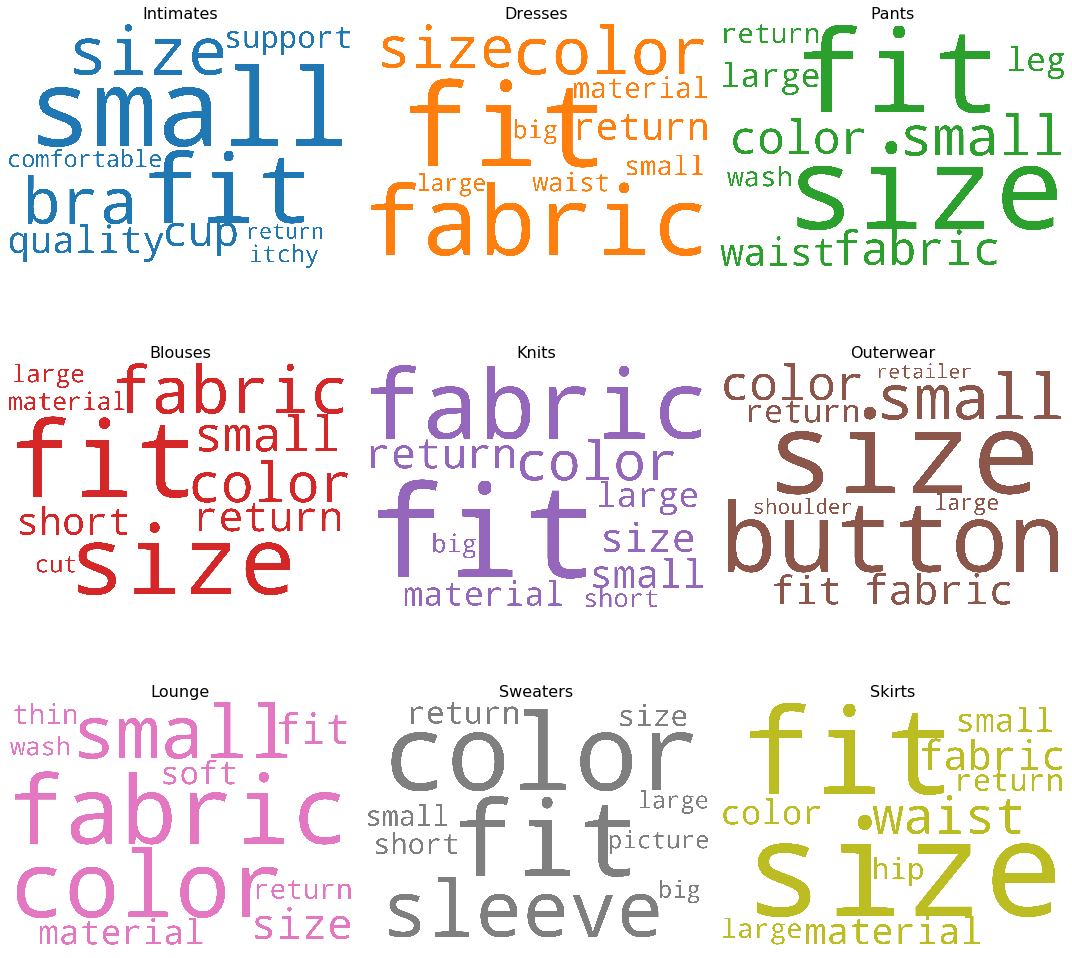

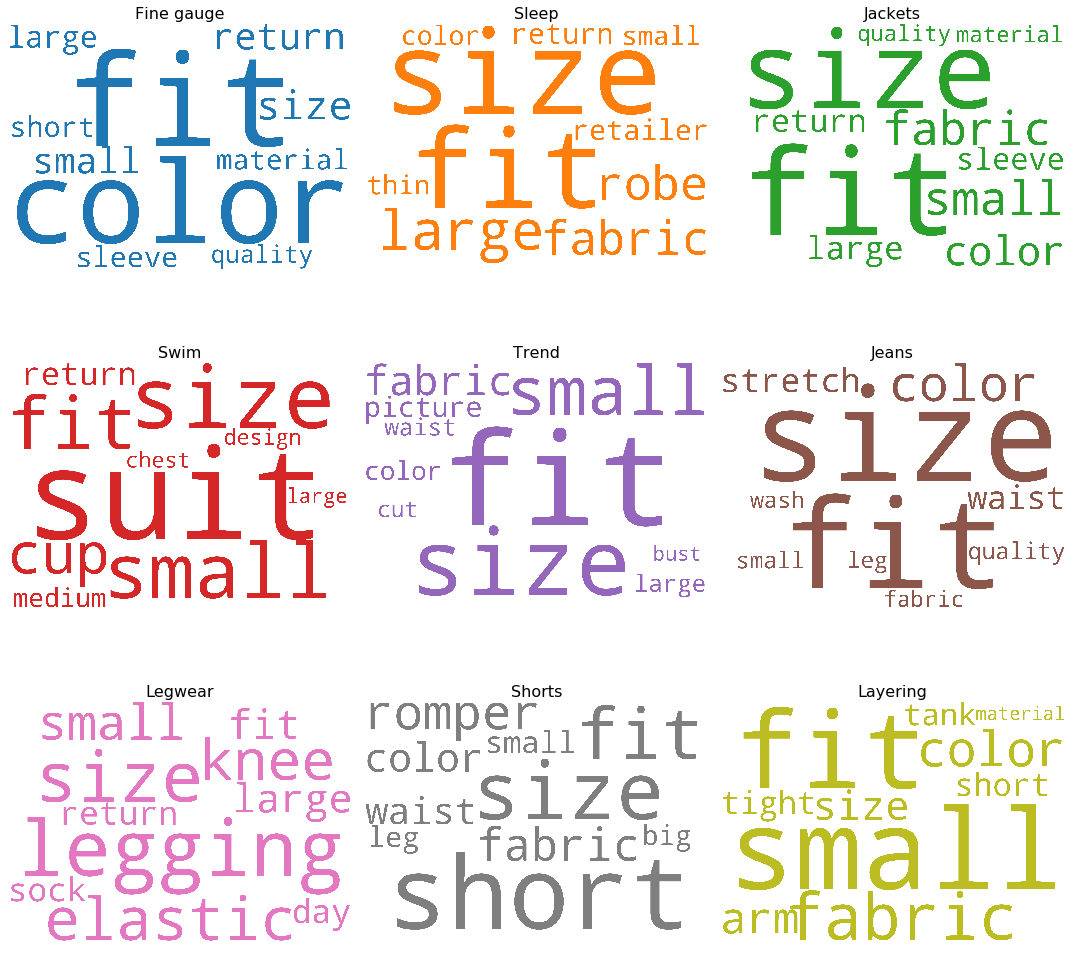

In [42]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
import time
from tqdm import tqdm_notebook as tqdm


def generate_wordcloud(df,class_name,nrow,ncol):
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
    cloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=10,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: cols[i],
                      prefer_horizontal=1.0)
    fig, axes = plt.subplots(nrow, ncol, figsize=(15,15), sharex=True, sharey=True)
    for i, ax in tqdm(enumerate(axes.flatten())):
        fig.add_subplot(ax)
        
        data = df[(df['Rating'] <= 3) & (df['Class_Name'] == class_name[i])]
        processed_data=data['tokens'].values.tolist()
        flat_data = [item for sublist in processed_data for item in sublist]
        text = " ".join(sentence for sentence in flat_data)

    #     data = df[(df['Rating'] <= 3) & (df['Class_Name'] == class_name[i])]
    #     text = " ".join(review for review in data['Title'].astype(str))

        cloud.generate(text)
        plt.gca().imshow(cloud)
        plt.gca().set_title(class_name[i], fontdict=dict(size=16))
        plt.gca().axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

class_name1 = ['Intimates', 'Dresses', 'Pants', 'Blouses', 
               'Knits', 'Outerwear','Lounge', 'Sweaters', 'Skirts']
class_name2 = [ 'Fine gauge','Sleep','Jackets', 'Swim', 'Trend', 
               'Jeans', 'Legwear', 'Shorts', 'Layering']
generate_wordcloud(df,class_name1,3,3)
generate_wordcloud(df,class_name2,3,3)

The insights from these wordclouds can be valuable to somehow validate the topic modeling output.

### Count number of words in a sentence
to see if applying LDA is ok (LDA doesn't perform well if sentence is less than 20 words

In [9]:
path1 = '/Users/dangloan/Documents/learning_analytics/project/2_code/project_3/women-clothing/pickle'
df2 = pd.read_pickle(path1 + '/clean_df.pkl')

In [34]:
df['count_word'] = df['Review_Text'].apply(lambda x: len(x.split()))
df['count_word_cleaned'] = df['Review_Text_cleaned'].apply(lambda x: len(x.split()))

In [36]:
df['count_word_cleaned'].describe()

count    23465.000000
mean     27.239633   
std      13.733937   
min      1.000000    
25%      16.000000   
50%      27.000000   
75%      40.000000   
max      58.000000   
Name: count_word_cleaned, dtype: float64

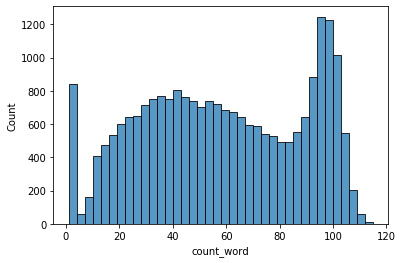

In [32]:
import seaborn as sns
sns.histplot(data=df, x="count_word", binwidth=3)

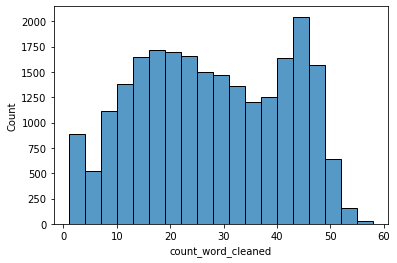

In [35]:
import seaborn as sns
sns.histplot(data=df, x="count_word_cleaned", binwidth=3)

The average number of words in a clean text (in a row) is 27 (>20), which is fine for applying LDA. One possible way to increase number of word in a text is to merge reviews of the same product into one cell (negative to negative, positive to positve, not mixing negative with positive reviews).

### Top frequent word

In [57]:
def flat_words(data):
    processed_df = data['tokens'].values.tolist()
    flat = [item for sublist in processed_df for item in sublist]
    return flat
flat_pos = flat_words(pos_rating)
flat_neg = flat_words(neg_rating)

In [59]:
!pip install matplotlib_venn

  Stored in directory: /Users/dangloan/Library/Caches/pip/wheels/c5/9c/ac/77b0c9151c4c264bec6ba18120d73bb24df5b4c1f09c17a41c
Successfully built matplotlib-venn


In [60]:
import matplotlib_venn as venn
from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles
import matplotlib.pyplot as plt

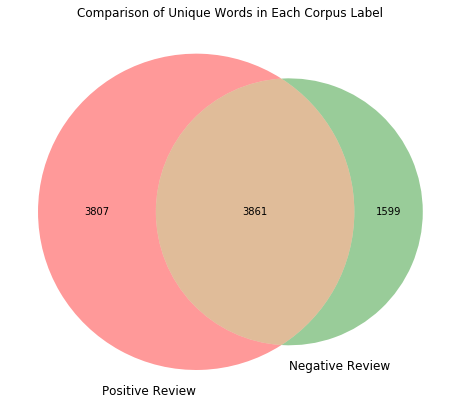

In [66]:
fig = plt.figure(figsize=[8,8])
venn2([set(flat_pos), set(flat_neg)], set_labels = ('Positive Review', 'Negative Review'))
plt.title('Comparison of Unique Words in Each Corpus Label')
plt.show()
# plt.savefig('../visualizations/word_venn.png', bbox_inches = "tight", pad_inches=.5)

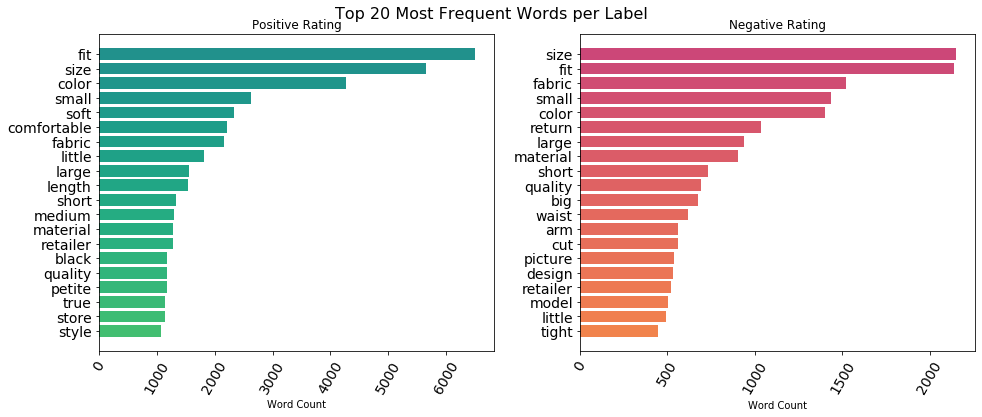

In [63]:
# Import libraries
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
# from plotly import __version__
# %matplotlib inline
# import cufflinks as cf
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)

# init_notebook_mode(connected=True)
# cf.go_offline()


def get_top_n_words(data, n=None):
    processed_df = data['tokens'].values.tolist()
    corpus = [item for sublist in processed_df for item in sublist]
    vec = CountVectorizer(stop_words = stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# processed_data1=pos_rating['tokens'].values.tolist()
# flat_data1 = [item for sublist in processed_data1 for item in sublist]

# processed_data2=neg_rating['tokens'].values.tolist()
# flat_data2 = [item for sublist in processed_data2 for item in sublist]

common_words1 = get_top_n_words(pos_rating, 20)
# for word, freq in common_words1:
#     print(word, freq)
common_words1 = pd.DataFrame(common_words1, columns = ['ReviewText' , 'count'])
# b = a.groupby('ReviewText').sum()['count'].reset_index().sort_values(by='count',ascending=False)


common_words2 = get_top_n_words(neg_rating, 20)
# for word, freq in common_words2:
#     print(word, freq)
common_words2 = pd.DataFrame(common_words2, columns = ['ReviewText' , 'count'])
# bb = aa.groupby('ReviewText').sum()['count'].reset_index().sort_values(by='count',ascending=False)




# set the color of the bar graphs
from matplotlib import cm
color_pos = cm.viridis(np.linspace(.5,.8, 30))
color_neg = cm.plasma(np.linspace(.5,.8, 30))
new_figure = plt.figure(figsize=(14,6))

ax = new_figure.add_subplot(121)
ax.invert_yaxis()

ax2 = new_figure.add_subplot(122)
ax2.invert_yaxis()

ax.barh(common_words1['ReviewText'], common_words1['count'],color=color_pos)
ax.title.set_text('Positive Rating')

ax2.barh(common_words2['ReviewText'], common_words2['count'],color=color_neg)
ax2.title.set_text('Negative Rating')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60, fontsize=14)
    plt.xlabel("Word Count")
    plt.yticks(fontsize=14)
plt.tight_layout(pad=2)

new_figure.suptitle('Top 20 Most Frequent Words per Label', fontsize=16)

# plt.savefig('../visualizations/label_word_count_y.png', bbox_inches = "tight", pad_inches=.5)
plt.show()

There are overlaped words between positive reviews and negative reviews. Out of total **5460** words in cleaned negative reviews, there are **3861** words overlap with those in cleaned positive reviews (**70.7%**). The bar charts also show that **both customers who are satisfied and not satisfied with the bought item care** about certain aspects, such as the fit, size, color, fabric, etc.

This insight strenthens my aprroach to dive depper into only the negative reviews and analyze if there are any cluster of issues (groups of issues) that seller can improve their product. Learning and improving from failures has been a good approach to compete in the market.

Therefore, my next step of the analysis is the topic modeling task using Latent Class Allocation LDA and Semantic Class Analysis. I then decide which model yields the most quality topics and map the model result back to the original dataframe.